In [ ]:
import numpy as np

import random

import cv2

from matplotlib import pyplot as plt

def sp_noise(image,prob):

    '''

    添加椒盐噪声

    prob:噪声比例

    '''

    output = np.zeros(image.shape,np.uint8)

    thres = 1 - prob

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rdn = random.random()

            if rdn < prob:

                output[i][j] = 0

            elif rdn > thres:

                output[i][j] = 255

            else:

                output[i][j] = image[i][j]

    return output

def gasuss_noise(image, mean=0, var=0.001):

    '''

        添加高斯噪声

        mean : 均值

        var : 方差

    '''

    image = np.array(image/255, dtype=float)

    noise = np.random.normal(mean, var ** 0.5, image.shape)

    out = image + noise

    if out.min() < 0:

        low_clip = -1.

    else:

        low_clip = 0.

    out = np.clip(out, low_clip, 1.0)

    out = np.uint8(out*255)

    #cv.imshow("gasuss", out)

    return out

# Read image

img = cv2.imread("../paojie.jpg")

# 添加椒盐噪声，噪声比例为 0.02

out1 = sp_noise(img, prob=0.02)

# 添加高斯噪声，均值为0，方差为0.001

out2 = gasuss_noise(img, mean=0, var=0.001)

# 显示图像

plt.figure(1)

plt.subplot(131)

plt.axis('off')  # 关闭坐标轴

plt.title('Original')

plt.imshow(img)

plt.subplot(132)

plt.axis('off')

plt.title('Add Salt and Pepper noise')

plt.imshow(out1)

plt.subplot(133)

plt.axis('off')

plt.title('Add Gaussian noise')

plt.imshow(out2)

plt.show()

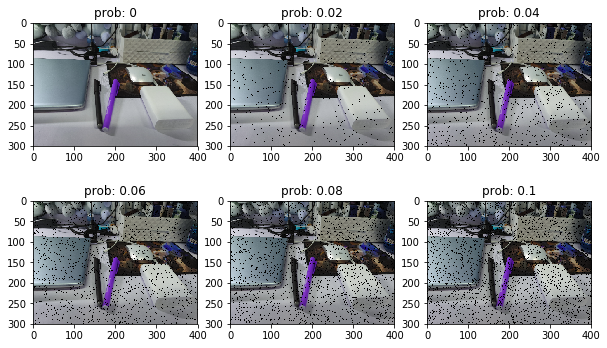

In [14]:
import numpy as np

import random

import cv2

from matplotlib import pyplot as plt

def salt_noise(image,prob):
    """
    添加椒噪声
    image:输入的图像，np.array类型
    prob: 噪声比例
    """

    output = np.zeros(image.shape,np.uint8)

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rand_val = random.random()

            if rand_val < prob:
                output[i][j] = 255
                
            else:
                output[i][j] = image[i][j]

    return output

def pepper_noise(image,prob):
    """
    添加椒噪声
    image:输入的图像，np.array类型
    prob: 噪声比例
    """

    output = np.zeros(image.shape,np.uint8)

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rand_val = random.random()

            if rand_val < prob:
                output[i][j] = 0
                
            else:
                output[i][j] = image[i][j]

    return output



if __name__ == "__main__":
    img = np.array(cv2.imread("desk.jpg"))
    img = cv2.resize(img, (400, 300))
    salt_noise_level = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
    plt.figure(figsize=(10,6))
    for i in range(0, 6):
        out = pepper_noise(img.copy(), prob=salt_noise_level[i])
        plt.subplot(2, 3, i+1)
        plt.title("prob: {}".format(salt_noise_level[i]))
        plt.imshow(out)
    
    plt.savefig("pepper_noise.png")
    plt.show()